# Hornbeck

In [1]:
import pandas as pd
import seaborn as sns

In [20]:
df = pd.read_csv('avocado.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [23]:
df.query("region == 'Albany' and type == 'conventional' and Date == '2015'")
newdf=df[['Date','Total Bags','Small Bags']]
newdf.head(5)

,Date,Total Bags,Small Bags
0,2015-12-27,8696.87,8603.62
1,2015-12-20,9505.56,9408.07
2,2015-12-13,8145.35,8042.21
3,2015-12-06,5811.16,5677.40
4,2015-11-29,6183.95,5986.26


In [24]:
melt=pd.melt(newdf, id_vars = ['Date'], var_name='Bags', value_name ='Count')
melt

,Date,Bags,Count
0,2015-12-27,Total Bags,8696.87
1,2015-12-20,Total Bags,9505.56
2,2015-12-13,Total Bags,8145.35
3,2015-12-06,Total Bags,5811.16
4,2015-11-29,Total Bags,6183.95
...,...,...,...
36493,2018-02-04,Small Bags,13066.82
36494,2018-01-28,Small Bags,8940.04
36495,2018-01-21,Small Bags,9351.80
36496,2018-01-14,Small Bags,10919.54


<AxesSubplot:xlabel='Date', ylabel='Count'>

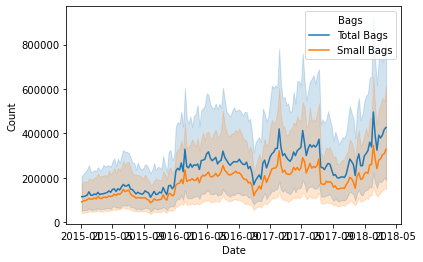

In [25]:
sns.lineplot(x='Date',y='Count', hue='Bags',data=melt)

In [26]:
#bin Total Volume to Poor, Modest Good, Excellent. Into new column Sales Volume#

df['Sales Volume']=pd.cut(df['Total Volume'],bins=df['Total Volume'].quantile(q=[0,.25,.5,.75,1]), labels = ['Poor','Modest','Good','Excellent'])
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Sales Volume
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Modest
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Modest
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Good
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Modest
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Modest


<AxesSubplot:xlabel='year', ylabel='count'>

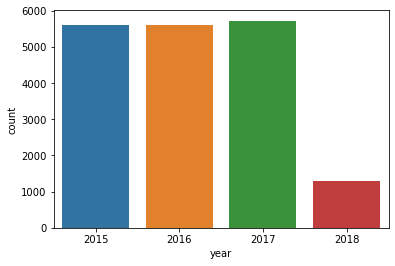

In [27]:
sns.countplot(x=df['year'])

In [28]:
pd.melt( df, id_vars= 'year' , var_name='Bags', value_name ='Count')

,year,Bags,Count
0,2015,Unnamed: 0,0
1,2015,Unnamed: 0,1
2,2015,Unnamed: 0,2
3,2015,Unnamed: 0,3
4,2015,Unnamed: 0,4
...,...,...,...
255481,2018,Sales Volume,Modest
255482,2018,Sales Volume,Modest
255483,2018,Sales Volume,Modest
255484,2018,Sales Volume,Modest


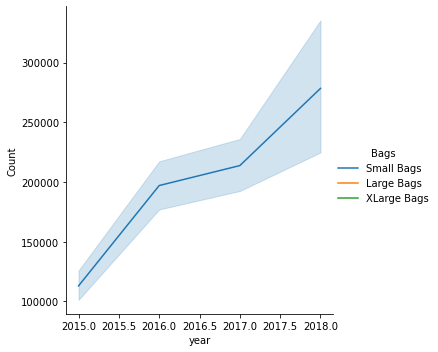

In [29]:
Bags = df[['Small Bags', 'Large Bags', 'XLarge Bags']]

newmelt= pd.melt(Bags, var_name='Bags',value_name='Count')

sns.relplot(x='year', y=newmelt['Count'],hue=newmelt['Bags'],kind='line', data=df)


## The small bags are the ones that sell the best.